# Arranging multiple Axes in a Figure



通常情况下，一个 figure 上需要多个 axes，通常组织成一个 regular grid。Matplotlib在库的历史上有多种工具生成Axes网格。在这里，我们将讨论我们认为用户最常使用的工具，即 underpin how Axes are organized，并提到了一些旧工具。

Matplotlib 使用* Axes* 来指代包含 data、x-和y-axis、ticks、labels、title等。另一个经常使用的术语是“subplot”，它指与其他Axes对象一起在网格中的轴。

## Create grid-shaped combinations of Axes

`~matplotlib.pyplot.subplots`: 用于创建 figures 和 axes grid 的主要函数。它一次在 figure 上创建和放置所有轴，并返回一个带有 grid 中 Axes 句柄的对象数组。 见`.Figure.subplots`。

`~matplotlib.pyplot.subplot_mosaic`: 一种创建 figure 和 axes grid 的简单方法，并添加了 Axes 也可以跨越行或列的灵活性。在标记的字典中返回 axes ，而不是数组。参见：`.Figure.subplot_mosaic`和：doc:`/tutorials/provisional/mosaic`。

有时，拥有不止一组不同的 axes grids 是很自然的，在这种情况下，Matplotlib 有 `.SubFigure` 的概念：

`~matplotlib.figure.SubFigure`:  在一个 figure 中的虚拟 figure

## Underlying tools

这些的基础是 `~.gridspec.GridSpec` 的概念和一个 `~.SubplotSpec`：

`~matplotlib.gridspec.GridSpec`： 指定子图将为网格的几何形状放置。网格的行数和列数需要设置。或者，子图布局参数（例如，左、右等）可以调整。

`~matplotlib.gridspec.SubplotSpec`： 指定给定 `GridSpec` 中子图的位置。


## Adding single Axes at a time

上述函数在单个函数调用中创建所有轴。它也可以一次添加一个轴，这就是Matplotlib的最初方式。然而，这样做通常不那么优雅和灵活。 尽管有时对交互式工作或在自定义位置中放置轴很有用：

`~matplotlib.figure.Figure.add_axes`： 在指定的位置添加单个轴。

`~matplotlib.pyplot.subplot` 或 `.Figure.add_subplot`： 在 figure 上添加单个子图，具有基于1的索引（继承自Matlab）。可以通过指定网格范围来跨列和行。

`~matplotlib.pyplot.subplot2grid`： 类似于 `.pyplot.subplot`，但使用基于0的索引和 two-d python切片以选择单元格。

## High-level methods for making grids

我们可以使用 `~matplotlib.pyploy.subplots` 创建一个 2-by-2 的 Axes 的网格。它返回一个 `~matplotlib.figure.Figure` 实例 和 一组 `~matplotlib.axes.Axes` 对象。 Axes 对象可以使用方法在 Axes 上放置 artists; 这里我们使用 `~.Axes.annotate`， 但是其他的例子可以是 `~.Axes.plot`， `~.Axes.pcolormesh`, 等等。


In [1]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0.98, 'plt.subplots()')

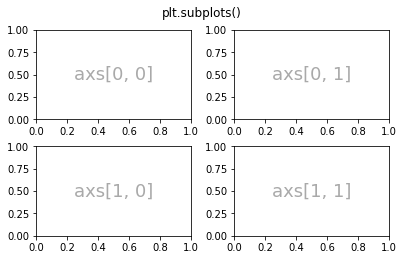

In [2]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        constrained_layout=True)
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                               transform=axs[row, col].transAxes,
                               ha='center', va='center', fontsize=18,
                               color='darkgrey')
fig.suptitle('plt.subplots()')

我们会注释很多Axes，所以让我们封装注释

In [3]:
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
           ha="center", va="center", fontsize=fontsize, color="darkgrey")

`~.pyplot.subplot_mosaic`可以达到相同的效果，但返回的类型是字典而不是数组， 其给键值有用的含义。这里我们有两个列表， 表示一行，并且列表里每个元素表示列。

Text(0.5, 0.98, 'plt.subplot_ mosaic')

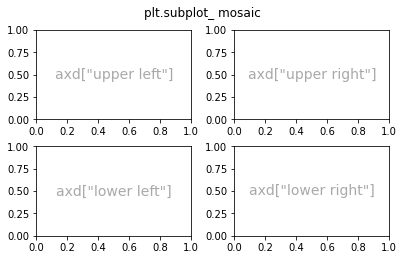

In [4]:
fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                                ['lower left', 'lower right']],
                               figsize=(5.5, 3.5), constrained_layout=True)
for k in axd:
    annotate_axes(axd[k], f'axd["{k}"]', fontsize=14)
fig.suptitle('plt.subplot_ mosaic')

# Axes spanning rows or columns in a grid

有时，我们希望Axes跨网格的行或列。实际上有多重方式完成这件事， 但是最方便的可能通过重复一个键使用 `~.pyplot.subplot_mosaic`

Text(0.5, 0.98, 'plt.subplot_mosaic()')

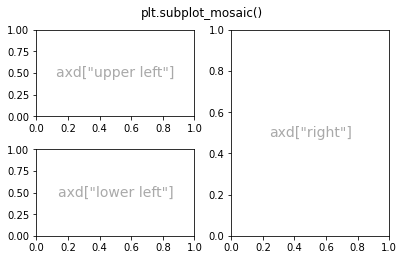

In [5]:
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(5.5, 3.5), constrained_layout=True)
for k in axd:
    annotate_axes(axd[k], f'axd["{k}"]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

看下面的描述来如何使用 `~matplotlib.gridspec.GridSpec` 或 `~matplotlib.pyplot.subplot2grid`实现相同的事情。

## Variable widths or heights in a grid

`~.pyploy.subplot` 和 `~.pyplot.subplot_mosaic` 使用 **gridspec_kw** 关键字参数 允许 grid 中行有不同的高度， 列有不同的宽度。 由 `~matplotlib.gridspec.GridSpec` 接收的空间参数可以传入 `~matplotlib.pyplot.subplots` 和 `~matplotlib.pyplot.subplot_mosaic`。

Text(0.5, 0.98, 'plt.subplot_mosaic()')

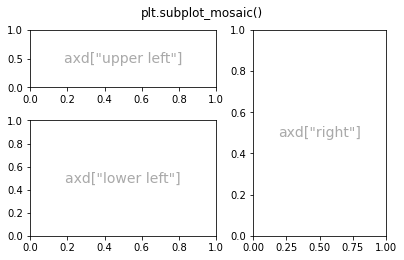

In [6]:
gs_kw = dict(width_ratios=[1.4, 1], height_ratios=[1, 2])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(5.5, 3.5),
                              constrained_layout=True)
for k in axd:
    annotate_axes(axd[k], f'axd["{k}"]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

## Nested Axes layouts

有时有两个或更多 Axes 的 grids 是有帮助的，其不需要和另一个相关。 最简单的方式使用 `Figure.subfigures`。 注意 subfigure layouts 是独立的， 因此在每个 subfigure 的 Axes spines 对齐并不是必要的。看下面的例子对于一个更 verbose 的方式使用 `~.gridspec.GridSpecFromSubplotSpec` 取得效果

Text(0.02, 0.5, 'ylabel for subfigs[1]')

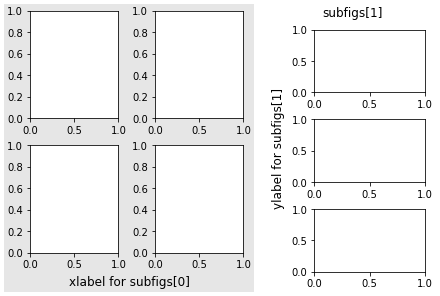

In [7]:
fig = plt.figure(constrained_layout=True)
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(2, 2)
subfigs[0].set_facecolor('0.9')
subfigs[0].supxlabel('xlabel for subfigs[0]')

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')


使用 `~.pyploy.subplot_mosaic` 构造 Axes。 这种方法不像上面那样使用 subfigures，所以缺少添加每个 subfigure `suptitle` 和 `supxlabel`等的能力。相反使用 `~.SubplotSpec.subgridspec` 方便地封装。

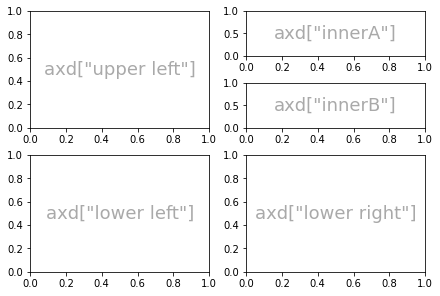

In [8]:
inner = [['innerA'],
         ['innerB']]
outer = [['upper left',  inner],
          ['lower left', 'lower right']]

fig, axd = plt.subplot_mosaic(outer, constrained_layout=True)
for k in axd:
    annotate_axes(axd[k], f'axd["{k}"]')

## Low-level and advanced grid methods

在内部， Axes 的 grid 的 安排是由 `~.GridSpec` 和 `~.SubplotSpec` 的创建实例控制的。**GridSpec** 定义了一个（可能不均匀）单元格网格。 **GridSpec** 的索引覆盖了一个或多个 grid cells, 并且可以用来指定 Axes 的位置。

下面的例子展示了使用 low-level 方法来安排 **GridSpec** 目标。

Text(0.5, 0.98, 'Manually added subplots using add_gridspec')

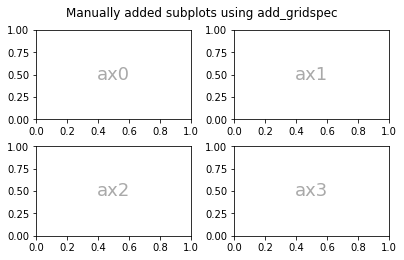

In [9]:
fig = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=2)

ax0 = fig.add_subplot(spec[0, 0])
annotate_axes(ax0, 'ax0')

ax1 = fig.add_subplot(spec[0, 1])
annotate_axes(ax1, 'ax1')

ax2 = fig.add_subplot(spec[1, 0])
annotate_axes(ax2, 'ax2')

ax3 = fig.add_subplot(spec[1, 1])
annotate_axes(ax3, 'ax3')

fig.suptitle('Manually added subplots using add_gridspec')

## Axes spanning rows or grids in a grid

我们可以使用 `Numpy slice` 语法索引 `spec` 数组。 这与 `fig, axd = plt.subplot_mosaic([['ax0', 'ax0'], ['ax1', 'ax2']], ...)` 相同

Text(0.5, 0.98, 'Manually added subplots, spanning a column')

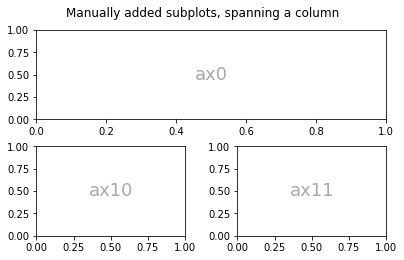

In [11]:
fig = plt.figure(figsize=(5.5, 3.5), constrained_layout=True)
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, :])
annotate_axes(ax0, 'ax0')

ax10 = fig.add_subplot(spec[1, 0])
annotate_axes(ax10, 'ax10')

ax11 = fig.add_subplot(spec[1, 1])
annotate_axes(ax11, 'ax11')

fig.suptitle('Manually added subplots, spanning a column')

## Manual adjustments to a **GridSpec** layout

当 **GridSpec** 显示使用， 你可以调整从 **GridSpec** 创建出来的 subplots 的 layout 参数。 注意这个选项与 `constrained_layout` 或 `.Figure.tight_layout` 不兼容， 其同时忽略了 `left` 和 `right` 以及 subplot 的尺寸。

通常这样的手动放置需要迭代，以使 Axes tick 标签不会与轴重叠。

这些空间参数也可以传入 `~.pyploy.subplots` 和 `~.pyplot.subplot_mosaic` 作为 **gridspec_kw** 参数。

Text(0.5, 0.98, 'Manual gridspec with right=0.75')

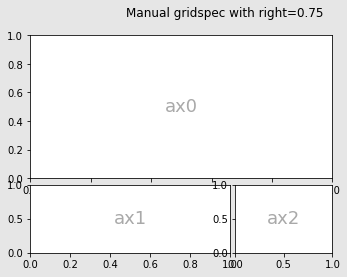

In [12]:
fig = plt.figure(constrained_layout=False, facecolor='0.9')
gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.75, hspace=0.1, wspace=0.05)

ax0 = fig.add_subplot(gs[:-1, :])
annotate_axes(ax0, 'ax0')
ax1 = fig.add_subplot(gs[-1, :-1])
annotate_axes(ax1, 'ax1')
ax2 = fig.add_subplot(gs[-1, -1])
annotate_axes(ax2, 'ax2')
fig.suptitle('Manual gridspec with right=0.75')

# Nested layouts with SubplotSpec

你可以使用 `~.gridspec.SubplotSpec.subgridspec` 创建与 `~.Figure.subfigures` 相似的 nested layout。

Text(0.5, 0.98, 'nested gridspecs')

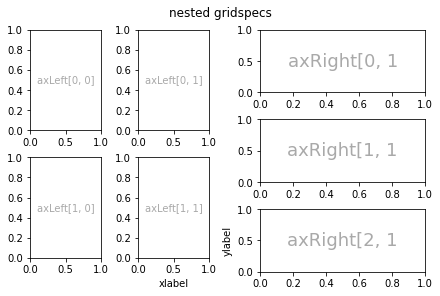

In [13]:
fig = plt.figure(constrained_layout=True)
gs0 = fig.add_gridspec(1, 2)

gs00 = gs0[0].subgridspec(2, 2)
gs01 = gs0[1].subgridspec(3, 1)

for a in range(2):
    for b in range(2):
        ax = fig.add_subplot(gs00[a, b])
        annotate_axes(ax, f'axLeft[{a}, {b}]', fontsize=10)
        if a == 1 and b == 1:
            ax.set_xlabel('xlabel')
            
for a in range(3):
    ax = fig.add_subplot(gs01[a])
    annotate_axes(ax, f'axRight[{a}, {b}')
    if a == 2:
        ax.set_ylabel('ylabel')

fig.suptitle('nested gridspecs')

这里有一个更复杂的嵌套 **GridSpec** 示例：我们创建一个外部4x4网格，每个单元格包含一个内部3x3轴网格。我们概述外部4x4网格，在每个内部3x3网格中隐藏适当的 spines。

In [14]:
def squiggle_xy(a, b, c, d, i=np.arange(0.0, 2*np.pi, 0.05)):
    return np.sin(i*a)*np.cos(i*b), np.sin(i*c)*np.cos(i*d)

In [15]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
outer_grid = fig.add_gridspec(4, 4, wspace=0, hspace=0)

<Figure size 576x576 with 0 Axes>

In [20]:
for a in range(4):
    for b in range(4):
        inner_grid = outer_grid[a, b].subgridspec(3, 3, wspace=0, hspace=0)
        axs = inner_grid.subplots()
        for (c, d), ax in np.ndenumerate(axs):
            ax.plot(*squiggle_xy(a + 1, b + 1, c + 1, d + 1))
            ax.set(xticks=[], yticks=[])

for ax in fig.get_axes():
    ss = ax.get_subplotspec()
    ax.spines.top.set_visible(ss.is_first_row())
    ax.spines.bottom.set_visible(ss.is_last_row())
    ax.spines.left.set_visible(ss.is_first_col())
    ax.spines.right.set_visible(ss.is_last_col())

plt.show()